In [ ]:
import os 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import keyboard
import h5py
import matplotlib.patches as patches

In [2]:
radar_path = r"D:\PAPERS\DIP2\New\RadarScenes\RadarScenes\data\sequence_1\radar_data.h5"
with h5py.File(radar_path, 'r') as f:
    # List all groups/datasets
    print("Keys:", list(f.keys()))

    # Access a specific dataset
    radar_data = pd.DataFrame(f['radar_data'][:])
    odometry_data = pd.DataFrame(f['odometry'][:])



Keys: ['odometry', 'radar_data']


In [3]:
def plot_radar_Cloud(start_index, end_index):
    points = radar_data[start_index:end_index]

# Extract positions in car coordinates
    x = points['x_cc']
    y = points['y_cc']
    rcs = points['label_id']  # Optional: intensity
    label_names = {
    0: 'Passenger Car',
    1: 'Large Vehicle',
    2: 'Truck',
    3: 'Bus',
    4: 'Train',
    5: 'Bicycle',
    6: 'Motorbike',
    7: 'Pedestrian',
    8: 'Pedestrian Group',
    9: 'Animal',
    10: 'Other Dynamic',
    11: 'Static'
    }

    # Use a colormap with distinct colors
    cmap = plt.cm.get_cmap('tab20', 12)

    fig, ax = plt.subplots(figsize=(7, 7))
    sc = ax.scatter(
        points['x_cc'], points['y_cc'],
        c=points['label_id'],
        cmap=cmap,
        s=30,
        edgecolors='k',
        linewidths=0.2
    )

    # Create legend manually
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                label=label_names[i],
                markerfacecolor=cmap(i), markersize=8)
            for i in np.unique(radar_data['label_id'])]

    ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.45, 1.0), title="Label ID")

    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.set_title("Radar Point Cloud Colored by Semantic Class")
    ax.set_aspect('equal')
    plt.grid(True)
    plt.tight_layout()
    # plt.show()


C:\Users\Skywalker\AppData\Local\Temp\ipykernel_17788\600304241.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 12)


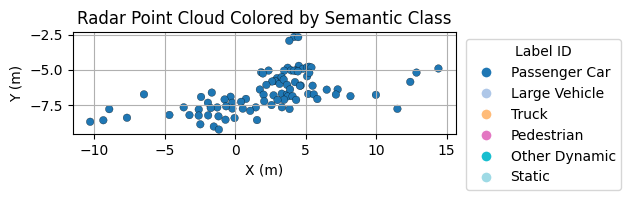

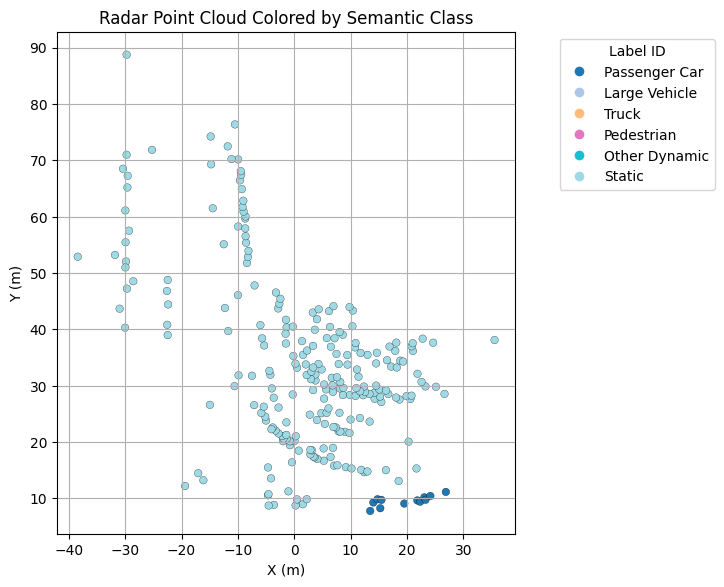

In [4]:
plot_radar_Cloud(538848,538939)
plot_radar_Cloud(538597,538848)

In [5]:


def convert_to_pandas(json_data):
    df = []
    columns = [
        "Sequence_Name",
        "Category",
        "Sequence_ID",
        'sensor_id',
        'prev_timestamp',
        'next_timestamp',
        'prev_timestamp_same_sensor',
        'next_timestamp_same_sensor',
        'odometry_timestamp',
        'odometry_index',
        'image_name',
        'radar_indices'
    ]
    scene_names = list(json_data["scenes"].keys())
    for i in range(len(json_data["scenes"])):
        df_row = []
        df_row.append(json_data["sequence_name"])
        df_row.append(json_data["category"])
        df_row.append(scene_names[i])
        # print(list(json_data["scenes"][scene_names[i]].values()))
        df_row.extend(list(json_data["scenes"][scene_names[i]].values()))
        df.append(df_row)
        
    return pd.DataFrame(df,columns=columns)

def Get_Collated_df(dir_path=None):
    sequences_dir_path = r"D:\PAPERS\DIP2\New\RadarScenes\RadarScenes\data"
    dfs = []
    for sequence_name in os.listdir(sequences_dir_path):
        if ("_" in sequence_name):
            scenes_meta_data = json.load(open(os.path.join(os.path.join(sequences_dir_path,sequence_name),'scenes.json')))
            df = convert_to_pandas(scenes_meta_data)
            dfs.append(df)

    df = pd.concat(dfs,axis = 0)
    df = df.sort_values(by="Sequence_Name")
    df.reset_index(inplace=True)
    df.drop(['index'],axis=1)
    return df



In [6]:
import json
from IPython.display import clear_output

scenes_data = json.load(open(r"D:\PAPERS\DIP2\New\RadarScenes\RadarScenes\data\sequence_1\scenes.json"))
seq_scenes = convert_to_pandas(scenes_data)

In [10]:
seq_scenes.sort_values("image_name")

,Sequence_Name,Category,Sequence_ID,sensor_id,prev_timestamp,next_timestamp,prev_timestamp_same_sensor,next_timestamp_same_sensor,odometry_timestamp,odometry_index,image_name,radar_indices
0,sequence_1,train,156862647501,1,NaN,1.568627e+11,NaN,1.568627e+11,156862651599,365,156862567343.jpg,"[0, 3]"
1,sequence_1,train,156862659751,2,1.568626e+11,1.568627e+11,NaN,1.568627e+11,156862661653,366,156862567343.jpg,"[3, 100]"
2,sequence_1,train,156862695773,4,1.568627e+11,1.568627e+11,NaN,1.568628e+11,156862691606,369,156862567343.jpg,"[100, 210]"
3,sequence_1,train,156862701077,3,1.568627e+11,1.568627e+11,NaN,1.568628e+11,156862701600,370,156862567343.jpg,"[210, 311]"
4,sequence_1,train,156862719325,1,1.568627e+11,1.568627e+11,1.568626e+11,1.568628e+11,156862721620,372,156862567343.jpg,"[311, 316]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4634,sequence_1,train,156948759386,2,1.569487e+11,1.569488e+11,1.569487e+11,1.569488e+11,156948761600,8976,156948916384.jpg,"[551958, 552078]"
4633,sequence_1,train,156948738559,3,1.569487e+11,1.569488e+11,1.569487e+11,1.569488e+11,156948741603,8974,156948916384.jpg,"[551698, 551958]"
4656,sequence_1,train,156949150967,4,1.569491e+11,1.569492e+11,1.569491e+11,NaN,156949041133,9004,156948916384.jpg,"[555463, 555745]"
4644,sequence_1,train,156948926064,1,1.569489e+11,1.569490e+11,1.569488e+11,1.569490e+11,156948921119,8992,156948916384.jpg,"[553767, 553845]"


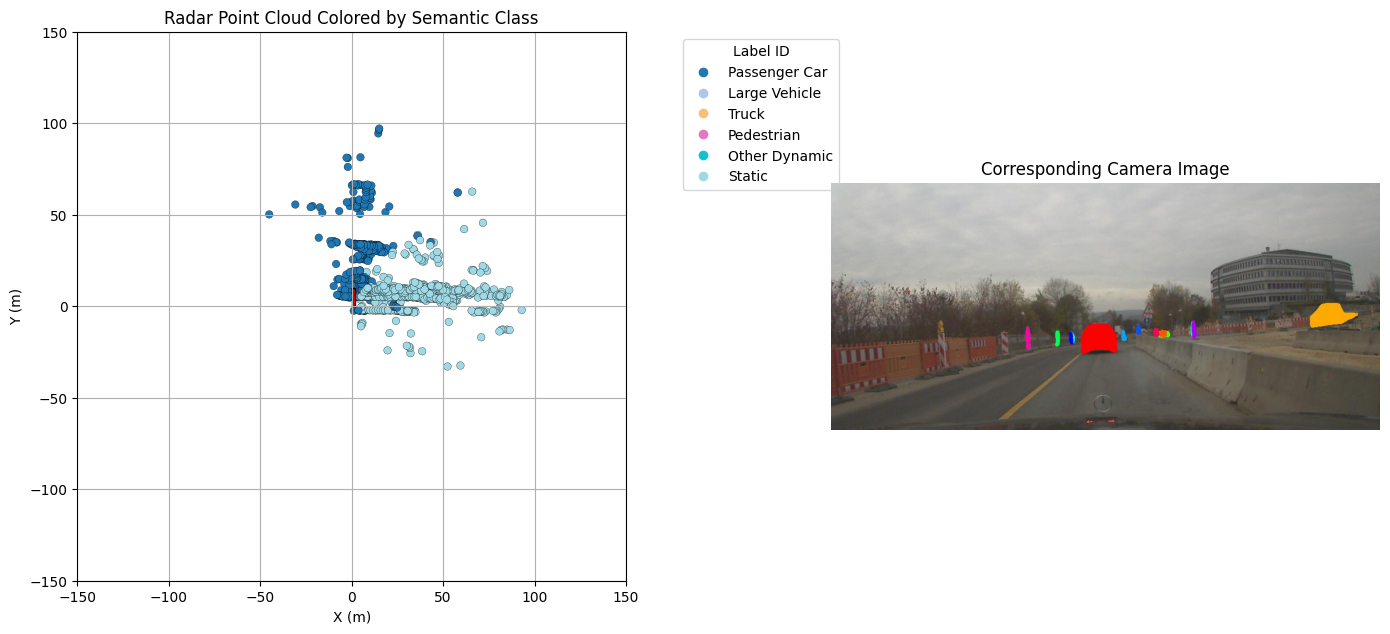

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

images = set(seq_scenes["image_name"])
image_path = r"D:\PAPERS\DIP2\New\RadarScenes\RadarScenes\data\sequence_1\camera"

label_names = {
    0: 'Passenger Car',
    1: 'Large Vehicle',
    2: 'Truck',
    3: 'Bus',
    4: 'Train',
    5: 'Bicycle',
    6: 'Motorbike',
    7: 'Pedestrian',
    8: 'Pedestrian Group',
    9: 'Animal',
    10: 'Other Dynamic',
    11: 'Static'
}

cmap = plt.cm.get_cmap('tab20', 12)

for image in images:
    image_details = seq_scenes[seq_scenes['image_name'] == image]
    radar_indices = image_details['radar_indices']

    fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    # Radar subplot
    for _, (start_index, end_index) in enumerate(radar_indices):
        points = radar_data[start_index:end_index]

        sc = ax[0].scatter(
            points['x_cc'], points['y_cc'],
            c=points['label_id'],
            cmap=cmap,
            s=30,
            edgecolors='k',
            linewidths=0.2
        )
    
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                label=label_names[i],
                markerfacecolor=cmap(i), markersize=8)
               for i in np.unique(radar_data['label_id'])]
    rect = patches.Rectangle((0,0),2,10,linewidth=1, edgecolor='black',facecolor = 'red')
    ax[0].add_patch(rect)
    ax[0].legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1.0), title="Label ID")
    ax[0].set_xlabel("X (m)")
    ax[0].set_ylabel("Y (m)")
    ax[0].set_title("Radar Point Cloud Colored by Semantic Class")
    ax[0].set_aspect('equal')
    ax[0].grid(True)

    ax[0].set_xlim(-150, 150)  # Change range as per your use case
    ax[0].set_ylim(-150, 150)


    # Image subplot
    img = Image.open(os.path.join(image_path, image))
    ax[1].imshow(img)
    ax[1].axis('off')
    ax[1].set_title("Corresponding Camera Image")

    plt.tight_layout()
    plt.show()
    # key = plt.waitforbuttonpress()
    if keyboard.is_pressed('q'):
        break
    while (keyboard.is_pressed('p')):
        ...
        
    clear_output(True)
